In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("C://Users//Other users//datascience//projects//data analysis//Air Bnb//Data//raw data//AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df=df.drop(columns=["id","name","host_id","host_name"])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: neighbourhood_group
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB
None
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 5


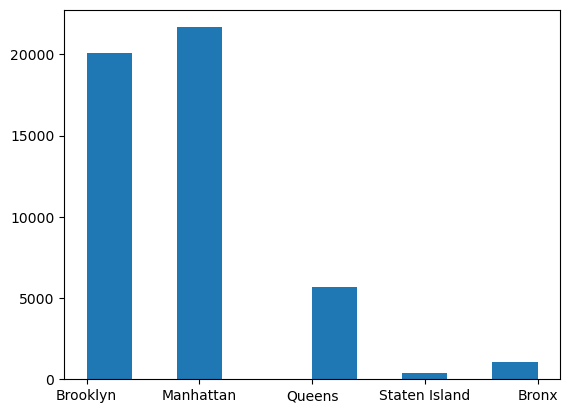

In [3]:
print(df["neighbourhood_group"].describe())
print("====================================")
print(df["neighbourhood_group"].info())
print("====================================")
print(df["neighbourhood_group"].unique(),df["neighbourhood_group"].nunique())
print("===================================")
import matplotlib.pyplot as plt
plt.hist(df["neighbourhood_group"])
plt.show()

count               48895
unique                  3
top       Entire home/apt
freq                25409
Name: room_type, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: room_type
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB
None
['Private room' 'Entire home/apt' 'Shared room'] 3
no of null val:  0


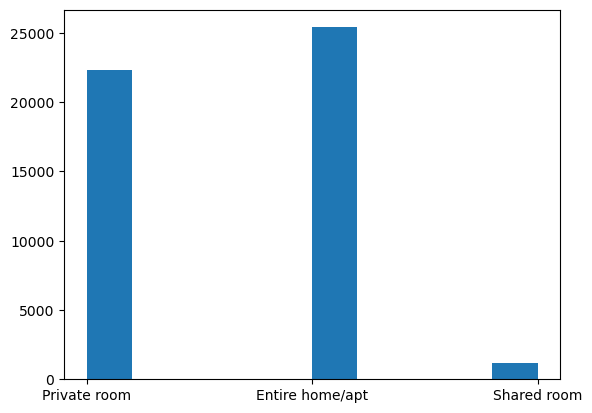

In [4]:
print(df["room_type"].describe())
print("====================================")
print(df["room_type"].info())
print("====================================")
print(df["room_type"].unique(),df["room_type"].nunique())
print("===================================")
print("no of null val: ",df["room_type"].isnull().sum())
import matplotlib.pyplot as plt
plt.hist(df["room_type"])
plt.show()

count            48895
unique             221
top       Williamsburg
freq              3920
Name: neighbourhood, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB
None
221
no of null val:  0


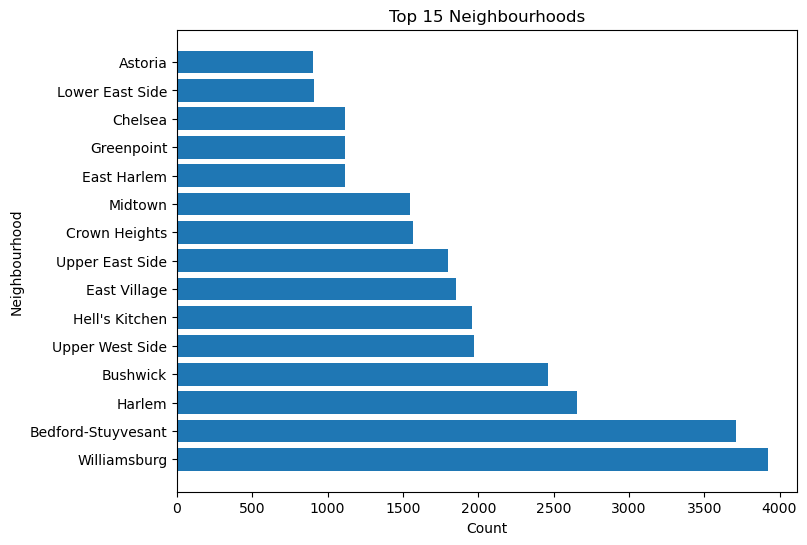

In [5]:
print(df["neighbourhood"].describe())
print("====================================")
print(df["neighbourhood"].info())
print("====================================")
print(df["neighbourhood"].nunique())
print("===================================")
print("no of null val: ",df["neighbourhood"].isnull().sum())
import matplotlib.pyplot as plt
counts = df["neighbourhood"].value_counts().head(15)  # Top 15
plt.figure(figsize=(8,6))
plt.barh(counts.index, counts.values)
plt.xlabel("Count")
plt.ylabel("Neighbourhood")
plt.title("Top 15 Neighbourhoods")
plt.show()

**so the data preprocessing for categorical variables have complted**

# DATA PREPROCESSING DISCRETE COUNT VARIABLES

In [6]:
print(df["minimum_nights"].info())
print("===========================")
print(df["minimum_nights"].describe())
print("============================")
print(df["minimum_nights"].isnull().sum())
print(df["minimum_nights"].nunique())
print("=============================")
print(df["minimum_nights"].min(),df["minimum_nights"].max())
print("===============================")
temp=df[df["minimum_nights"]>365]["minimum_nights"].index.tolist()
print(len(df))
# df.drop(index=temp)

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: minimum_nights
Non-Null Count  Dtype
--------------  -----
48895 non-null  int64
dtypes: int64(1)
memory usage: 382.1 KB
None
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64
0
109
1 1250
48895


- removing all the rows which has minimum_nights>365!

48881
count    48881.000000
mean         6.840429
std         16.452017
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        365.000000
Name: minimum_nights, dtype: float64
<class 'pandas.core.series.Series'>
Index: 48881 entries, 0 to 48894
Series name: minimum_nights
Non-Null Count  Dtype
--------------  -----
48881 non-null  int64
dtypes: int64(1)
memory usage: 763.8 KB
None


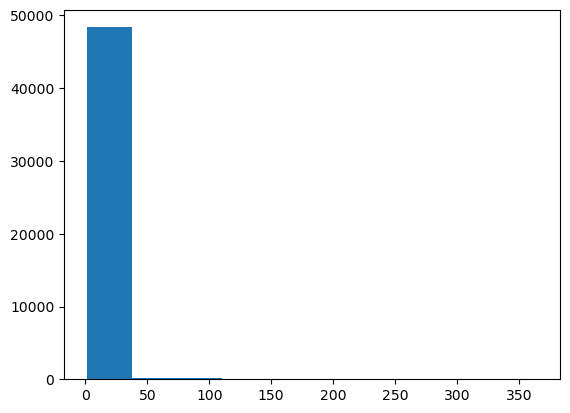

In [7]:
df.drop(index=temp,inplace=True)
print(len(df))
plt.hist(df["minimum_nights"])
print(df["minimum_nights"].describe())
print(df["minimum_nights"].info())
plt.show()


In [8]:
df["minimum_nights"].skew()

11.616075163438959

In [9]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
print(df["number_of_reviews"].describe(),end="\n\n\n")
print(df["number_of_reviews"].info(),end="\n\n\n")
print(df["number_of_reviews"].nunique())

# applying winsorization
q1=df["number_of_reviews"].quantile(0.25)
q3=df["number_of_reviews"].quantile(0.75)
print(q1,q3)
iqr=q3-q1
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
print(lower_limit,upper_limit)
rep1=df[df["number_of_reviews"]>upper_limit]["number_of_reviews"].index.tolist()
for i in rep1:
    df.loc[i,"number_of_reviews"]=int(upper_limit)
print(df.loc[[3,5,7],"number_of_reviews"])

count    48881.000000
mean        23.279618
std         44.555639
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


<class 'pandas.core.series.Series'>
Index: 48881 entries, 0 to 48894
Series name: number_of_reviews
Non-Null Count  Dtype
--------------  -----
48881 non-null  int64
dtypes: int64(1)
memory usage: 763.8 KB
None


394
1.0 24.0
-33.5 58.5
3    58
5    58
7    58
Name: number_of_reviews, dtype: int64


In [11]:
rep2=df[df["number_of_reviews"]<lower_limit]["number_of_reviews"].index.tolist()
for i in rep2:
    df.loc[i,"number_of_reviews"]=int(lower_limit)

- in number_of_reviews col we have applied winsorization  , and rounded up as int bcuz reviews count should be in int but not in float
- no need to change anything 


In [12]:
print(df["number_of_reviews"].describe())
print("skewness: ",df["number_of_reviews"].skew())

count    48881.000000
mean        15.615577
std         20.221722
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max         58.000000
Name: number_of_reviews, dtype: float64
skewness:  1.2210553862019815


In [13]:
df.rename(columns={"calculated_host_listings_count":"listing_count"},inplace=True)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listing_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,58,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [14]:
print(df["listing_count"].describe())
print(df["listing_count"].unique())
q1=df["listing_count"].quantile(0.25)
q3=df["listing_count"].quantile(0.95)
iqr=q3-q1
ul=q3+(1.5*iqr)
print(q1,q3,iqr)
temp=df[df["listing_count"]>ul]["listing_count"].index.tolist()
for i in temp:
    df.loc[i,"listing_count"]=int(ul)

count    48881.000000
mean         7.145639
std         32.957085
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: listing_count, dtype: float64
[  6   2   1   4   3   5   7  13  28  11   8   9  52  18  15  19  10  39
  26  29  12  21  96  14  34  43 121  37  49  31  91  16  87  33  23  50
  20  25 232  17  47 103  65  30  27 327  32]
1.0 15.0 14.0


In [15]:
print(df["listing_count"].describe())
print(df["listing_count"].info())
print(df["listing_count"].skew())

count    48881.000000
mean         3.355373
std          7.079071
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         36.000000
Name: listing_count, dtype: float64
<class 'pandas.core.series.Series'>
Index: 48881 entries, 0 to 48894
Series name: listing_count
Non-Null Count  Dtype
--------------  -----
48881 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB
None
3.925580166740822


In [16]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,listing_count,availability_365
count,48881.000000,48881.000000,48881.000000,48881.000000,48881.000000,38837.000000,48881.000000,48881.000000
mean,40.728949,-73.952166,152.725026,6.840429,15.615577,1.373380,3.355373,112.730284
std,0.054532,0.046161,240.183264,16.452017,20.221722,1.680517,7.079071,131.591522
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690090,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763120,-73.936270,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,365.000000,58.000000,58.500000,36.000000,365.000000


<class 'pandas.core.series.Series'>
Index: 48881 entries, 0 to 48894
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
48881 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB
None
count    48881.000000
mean       112.730284
std        131.591522
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64
0


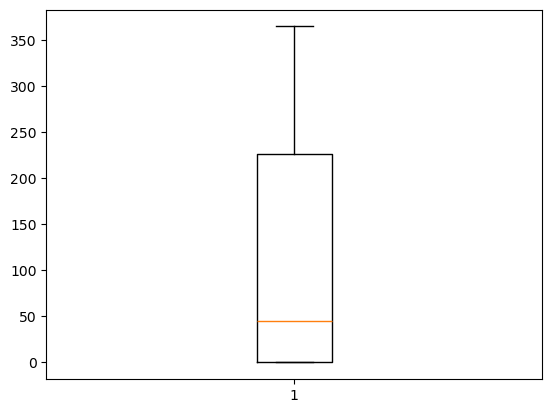

In [17]:
print(df["availability_365"].info())
print(df["availability_365"].describe())
print(df["availability_365"].isnull().sum())
plt.boxplot(df["availability_365"])
plt.show()

- no need to do anything with  avialability col !

# Continous variable

In [18]:
print(df["price"].info())
print(df["price"].describe())
print(df["price"].skew())                #skewed +ve
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1,q3)

<class 'pandas.core.series.Series'>
Index: 48881 entries, 0 to 48894
Series name: price
Non-Null Count  Dtype
--------------  -----
48881 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB
None
count    48881.000000
mean       152.725026
std        240.183264
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
19.117394805248068
69.0 175.0


In [19]:
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
print(ll,ul)
temp1=df[df["price"]>ul]["price"].index.tolist()
# print(temp1)
for i in temp1:
    df.loc[i,"price"]=ul
print(df["price"].describe())
print(df["price"].skew())

-90.0 334.0
count    48881.000000
mean       132.979788
std         83.531382
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64
1.0227530008642884


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48881 non-null  object 
 1   neighbourhood        48881 non-null  object 
 2   latitude             48881 non-null  float64
 3   longitude            48881 non-null  float64
 4   room_type            48881 non-null  object 
 5   price                48881 non-null  int64  
 6   minimum_nights       48881 non-null  int64  
 7   number_of_reviews    48881 non-null  int64  
 8   last_review          38837 non-null  object 
 9   reviews_per_month    38837 non-null  float64
 10  listing_count        48881 non-null  int64  
 11  availability_365     48881 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.9+ MB


In [21]:
from scipy import stats
df['price_boxcox'], lambda_bc = stats.boxcox(df['price'] + 1)

In [22]:
print(df["price_boxcox"].skew())

-0.0032211269458577736


In [23]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listing_count,availability_365,price_boxcox
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.747923
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,6.290030
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5.756616
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,58,2019-07-05,4.64,1,194,5.088796
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.955078


In [24]:
print(df["price_boxcox"].describe())
print(df["price_boxcox"].skew())


count    48881.000000
mean         5.369074
std          0.804668
min          0.000000
25%          4.771084
50%          5.310028
75%          5.957913
max          6.821902
Name: price_boxcox, dtype: float64
-0.0032211269458577736


what we have done in column **price**
- we have applied winsorization to remove possible outliers
- the skewness now is 1.02345.......
- so to make it more symmetric we have applied boxcox method 
- so the skewnees now for col:"price_boxcox" is -0.003......

In [25]:
print(df["reviews_per_month"].describe())
print(df["reviews_per_month"].isnull().sum())


count    38837.000000
mean         1.373380
std          1.680517
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64
10044


In [26]:
df["reviews_per_month"].fillna(0)

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48881, dtype: float64

In [27]:
df["reviews_per_month"].describe()
print(df["reviews_per_month"].skew())

3.130020179687379


In [28]:
df['reviews_per_month_boxcox'], lambda_bc = stats.boxcox(df['price'] + 1)
print(df["reviews_per_month_boxcox"].skew())

-0.0032211269458577736


In [29]:
df["reviews_per_month_boxcox"].describe()


count    48881.000000
mean         5.369074
std          0.804668
min          0.000000
25%          4.771084
50%          5.310028
75%          5.957913
max          6.821902
Name: reviews_per_month_boxcox, dtype: float64

**Description:**

- Represents the average number of reviews a listing receives per month.
- Continuous variable with decimal values.
- Some listings had missing values (~10k rows), which indicates the listing had no reviews yet.
- Handling Missing Values:
- Missing values were replaced with 0, because a missing review count logically means no reviews.

**Skewness & Transformation:**
- Original skewness was 3.3, indicating a highly right-skewed distribution (most listings have few reviews, a few have many).
- Applied Box-Cox transformation to reduce skewness.
- Transformed skewness ≈ –0.003, almost symmetric.

Descriptive Statistics (after Box-Cox):
| Metric | Value |
|--------|-------|
| Count | 48,881 |
| Mean | 5.37 |
| Std | 0.80 |
| Min | 0.00 |
| 25% | 4.77 |
| 50% | 5.31 |
| 75% | 5.96 |
| Max | 6.82 |


In [30]:
print(df["latitude"].info())
print(df["latitude"].describe())

stddev=df["latitude"].std(ddof=0)
avg=df["latitude"].mean()
print("coef of variation: ",stddev/avg)

<class 'pandas.core.series.Series'>
Index: 48881 entries, 0 to 48894
Series name: latitude
Non-Null Count  Dtype  
--------------  -----  
48881 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB
None
count    48881.000000
mean        40.728949
std          0.054532
min         40.499790
25%         40.690090
50%         40.723070
75%         40.763120
max         40.913060
Name: latitude, dtype: float64
coef of variation:  0.0013388846388722813


- latitude col is all perfect !

In [32]:
print(df["longitude"].info())
print(df["longitude"].describe())

stddev=df["longitude"].std(ddof=0)
avg=df["longitude"].mean()
print("coef of variation: ",abs(stddev/avg))

<class 'pandas.core.series.Series'>
Index: 48881 entries, 0 to 48894
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
48881 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB
None
count    48881.000000
mean       -73.952166
std          0.046161
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936270
max        -73.712990
Name: longitude, dtype: float64
coef of variation:  0.0006241919566716864


- longitude is all perfect no need of any change!

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   neighbourhood_group       48881 non-null  object 
 1   neighbourhood             48881 non-null  object 
 2   latitude                  48881 non-null  float64
 3   longitude                 48881 non-null  float64
 4   room_type                 48881 non-null  object 
 5   price                     48881 non-null  int64  
 6   minimum_nights            48881 non-null  int64  
 7   number_of_reviews         48881 non-null  int64  
 8   last_review               38837 non-null  object 
 9   reviews_per_month         38837 non-null  float64
 10  listing_count             48881 non-null  int64  
 11  availability_365          48881 non-null  int64  
 12  price_boxcox              48881 non-null  float64
 13  reviews_per_month_boxcox  48881 non-null  float64
dtypes: float64(

In [40]:
import os
print(os.getcwd())
df.drop(columns=["last_review"],inplace=True)

C:\Users\Other users\datascience\projects\data analysis\Air Bnb\Notebooks


In [42]:
df.to_csv("airbnb_cleaned.csv", index=False)

In [41]:
# df.to_excel("airbnb_cleaned.xlsx", index=False)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listing_count,availability_365,price_boxcox,reviews_per_month_boxcox
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.747923,5.747923
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,6.290030,6.290030
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,5.756616,5.756616
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,58,4.64,1,194,5.088796,5.088796
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.955078,4.955078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,4.788902,4.788902
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,4.108915,4.108915
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,5.413998,5.413998
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,4.492550,4.492550
